## Non ML Model approach

In [32]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
data_ = pd.read_csv('cleaned_data.csv')

In [12]:
X = data_.drop('ProgressStatus', axis=1)
y = data_['ProgressStatus']

In [22]:
# split data into train validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Baseline model (Most Frequent Class)
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
print("Baseline Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))


Baseline Model Performance:
Accuracy: 0.22276029055690072
Classification Report:
                      precision    recall  f1-score   support

            At Risk       0.00      0.00      0.00       103
           On Track       0.00      0.00      0.00       113
Severely Struggling       0.00      0.00      0.00       105
         Struggling       0.22      1.00      0.36        92

           accuracy                           0.22       413
          macro avg       0.06      0.25      0.09       413
       weighted avg       0.05      0.22      0.08       413



/home/jumashafara/venvs/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jumashafara/venvs/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jumashafara/venvs/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Performance:
Accuracy: 0.9927360774818402
Classification Report:
                      precision    recall  f1-score   support

            At Risk       0.97      1.00      0.99       103
           On Track       1.00      0.98      0.99       113
Severely Struggling       1.00      1.00      1.00       105
         Struggling       1.00      0.99      0.99        92

           accuracy                           0.99       413
          macro avg       0.99      0.99      0.99       413
       weighted avg       0.99      0.99      0.99       413



## Confusion Matrix

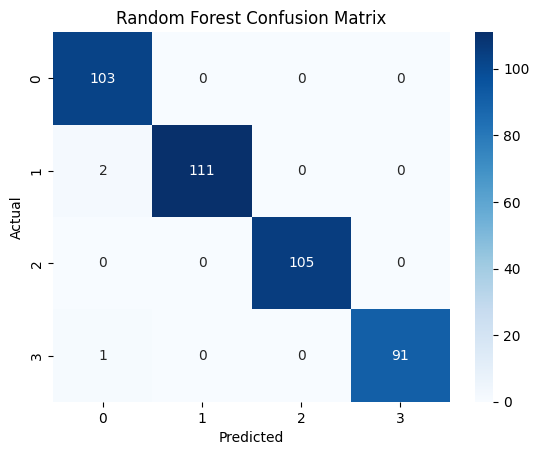

In [31]:
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Random Forest confusion matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)
plot_confusion_matrix(cm_forest, "Random Forest Confusion Matrix")


## Save Model

In [33]:
# save model with joblib
joblib.dump(random_forest_model, 'random_forest_model.joblib')

['random_forest_model.joblib']